In [1]:
import os
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/baard_v4


In [3]:
path_clean = os.path.join(PATH_ROOT, 'results', 'exp643896', 'MNIST', 'ApplicabilityStage', 'APGD-Linf', 'ApplicabilityStage-MNIST-APGD-Linf-clean.pt')

score_clean = torch.load(path_clean)
print(score_clean[:10])

[3.1593192 2.6863403 2.065223  2.1658397 3.2651396 3.157939  2.2869039
 1.98142   3.7203023 2.003308 ]


In [4]:
eps = 0.66
path_adv = os.path.join(PATH_ROOT, 'results', 'exp643896', 'MNIST', 'ApplicabilityStage', 'APGD-Linf', f'ApplicabilityStage-MNIST-APGD-Linf-{eps}.pt')

score_adv = torch.load(path_adv)
print(score_adv[:10])

[3.191142  2.8853488 2.8565688 3.2988544 3.268179  3.5647447 3.4838543
 3.2392952 2.91532   3.2466998]


<AxesSubplot: ylabel='Probability'>

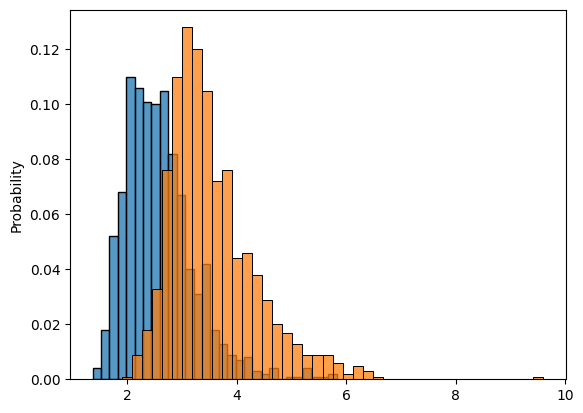

In [5]:
sns.histplot(score_clean, stat='probability')
sns.histplot(score_adv, stat='probability')

In [6]:
mean_clean = score_clean.mean()
std_clean = score_clean.std()

mean_adv = score_adv.mean()
std_adv = score_adv.std()

print(mean_clean, std_clean)
print(mean_adv, std_adv)


2.5996182 0.6438291
3.5533242 0.8027475


In [7]:
a = np.random.normal(mean_clean-0.4, scale=std_clean-0.1, size=1000)
b = np.random.normal(mean_adv, scale=std_adv+0.1, size=1000)

In [8]:
ibm_color_palette = [
    '#6D88C4',
    '#DC257F',
    '#6C63AC',
    '#F26322',
    '#FCB017',
]
# sns.set_palette(ibm_color_palette)
sns.set_theme(
    style='white', 
    palette=ibm_color_palette, 
    font_scale=1.2,
)
sns.set_style('ticks')

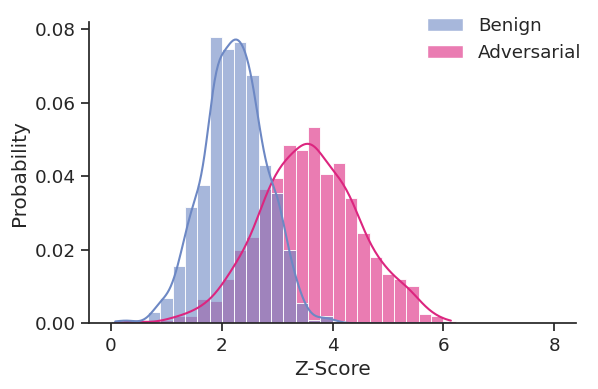

In [9]:
df = pd.DataFrame({
    'Benign': a,
    'Adversarial': b
})
ax = sns.displot(df,
                 kde=True,
                 alpha=0.6,
                 stat='probability',
                 aspect=1.1,
                 height=4,
                 binrange=(0, 8),
                 )
ax.set_xlabels('Z-Score')
sns.move_legend(ax, 'upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('applicability.pdf', dpi=300)
